# 1) Load Dependencies

In [1]:
import pandas as pd
from src.paper import pull_results, plot_metrics, create_descriptives, latex_exporter
from src.utils import csv_exporter
from src.utils.paths import *

Loading helper functions...
Loading paths...


# 2) Pull Results from Pipeline

In [2]:
# Use a specific timestamp, otherwise it just uses "latest"
# timestamp = "YYYYMMDD-hhmm"

# File names to analyze:
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] # + ['eurusd']

# Move pipeline results to "analyzed_data" folder
pull_results(timestamp="latest", file_prefix=file_names)

Finished pulling files!


# 3) Create Descriptive Table

In [3]:
# Select varibales to print in table
filter_variables = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] + ['x1', 'x2', 'x3'] # + ['bid_close']

In [4]:
descriptives = create_descriptives(file_names, filter_variables)

In [5]:
# Show table
display(descriptives)

,start,end,count,mean,std,min,25%,50%,75%,max
Data,,,,,,,,,,
RW,2004-01,2023-12,240.0,68.215495,10.103961,40.0,61.588426,68.492171,74.799536,90.0
TrendSeasRW,2004-01,2023-12,240.0,65.212735,9.860455,40.0,59.442427,65.278618,70.045723,90.0
WeakSARIMA,2004-01,2023-12,240.0,65.434632,9.932379,40.0,59.695437,65.626215,70.117469,90.0
StrongSARIMA,2004-01,2023-12,240.0,65.665527,10.656031,40.0,58.531350,66.647129,70.413462,90.0
SARIMAX,2004-01,2023-12,240.0,66.785970,12.470082,40.0,56.642862,68.105724,75.746263,90.0
x1,2004-01,2023-12,240.0,360.268079,73.697749,200.0,308.950805,381.153821,418.607367,500.0
x2,2004-01,2023-12,240.0,57.956553,8.979728,40.0,50.990507,56.779285,64.344842,80.0
x3,2004-01,2023-12,240.0,923.168300,12.484585,900.0,914.459089,921.004521,933.860990,950.0


In [6]:
# Export as csv
csv_exporter(TABLE_DIR, descriptives)


Exporting descriptives as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!


In [7]:
# Print and Export to LaTex
caption = "Descriptive Statistics"
# latex_exporter(descriptives, caption=caption)
with open(os.path.join(TABLE_DIR, "descriptives.tex"), "w") as f:
    f.write(latex_exporter(descriptives, caption=caption))

In [8]:
# Note: \usepackage{booktaps} in LaTex

# 4) Create Metrics Ranking Table

In [9]:
ranking_data = [os.path.join(PAPERDATA_DIR, file) for file in os.listdir(PAPERDATA_DIR) if file.endswith
("metrics_ranking.csv")]

In [10]:
# Print and export to LaTex and csv
ranking_list = []
for i, file in enumerate(file_names):
    ranking = pd.read_csv(os.path.join(PAPERDATA_DIR, f"{file}_metrics_ranking.csv"), index_col="Model")
    ranking_list.append(ranking)
    caption = f"Ranking Forecasters and Ensemblers by Predictive Performance - Data Complexity: {i + 1}"
    
    # print(f"Table for Complexity {i+1}\n")
    # print(latex_exporter(df, caption=caption))
    # print("\n")
    # Export to LaTex
    with open(os.path.join(TABLE_DIR, f"metrics_ranking_compl{i+1}.tex"), "w") as f:
        f.write(latex_exporter(ranking, caption=caption))
    # Export to csv
    csv_exporter(TABLE_DIR, ranking)
    
    print(f"\nRanking for {file}:")
    display(ranking)


Exporting ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for RW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Variance,0.055518,4.906257,3.678652,1,1,1
Weighted Ensemble: Inverse RMSE,0.055839,4.924158,3.699730,2,2,2
Weighted Ensemble: Simple,0.056098,4.954370,3.717265,3,3,3
AutoSARIMA,0.057057,4.965778,3.775760,4,4,4
Exponential Smoothing,0.057065,4.967759,3.776259,5,5,5
Naive,0.059176,5.149567,3.925315,6,6,6
Naive (drift),0.059342,5.165420,3.938057,7,7,7
Weighted Ensemble: Inverse Error Covariance,0.061030,5.250322,4.022200,8,9,8
Meta Ensemble: SVR,0.061396,5.223736,4.057004,9,8,9



Exporting ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for TrendSeasRW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse RMSE,0.036957,3.214268,2.461733,1,1,1
Weighted Ensemble: Simple,0.036960,3.218006,2.462334,2,2,2
Weighted Ensemble: Inverse Variance,0.036984,3.218687,2.463735,3,3,3
AutoSARIMA,0.038023,3.294485,2.528518,4,4,4
Weighted Ensemble: Inverse Error Covariance,0.038560,3.362233,2.563526,5,5,5
Exponential Smoothing,0.039453,3.385891,2.624681,6,6,6
Meta Ensemble: SVR,0.040147,3.595129,2.684202,7,9,7
Naive,0.040938,3.502125,2.724533,8,7,8
Naive (drift),0.041083,3.511998,2.734293,9,8,9



Exporting ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for WeakSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Simple,0.030278,2.644191,2.018751,1,3,1
Weighted Ensemble: Inverse RMSE,0.030288,2.640407,2.018978,2,2,2
Weighted Ensemble: Inverse Variance,0.030291,2.639048,2.019391,3,1,3
Weighted Ensemble: Inverse Error Covariance,0.030836,2.761528,2.054576,4,5,4
AutoSARIMA,0.031148,2.710313,2.073020,5,4,5
Exponential Smoothing,0.032660,2.781677,2.174801,6,6,6
Meta Ensemble: SVR,0.032751,2.972857,2.190514,7,9,7
Naive,0.032951,2.791199,2.194743,8,7,8
Naive (drift),0.033013,2.798546,2.198737,9,8,9



Exporting ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for StrongSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
AutoSARIMA,0.022377,1.989715,1.490504,1,1,1
Weighted Ensemble: Inverse RMSE,0.022488,2.026515,1.499780,2,5,2
Weighted Ensemble: Inverse Variance,0.022584,2.044171,1.506408,3,6,3
Weighted Ensemble: Simple,0.022794,2.071574,1.520430,4,7,4
Naive,0.022841,2.014759,1.522180,5,2,5
Exponential Smoothing,0.022841,2.014759,1.522180,6,3,6
Naive (drift),0.022867,2.018742,1.523473,7,4,7
Meta Ensemble: SVR,0.023589,2.161485,1.576335,8,8,8
Meta Ensemble: Random Forest,0.025617,2.366965,1.709780,9,9,9



Exporting ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for SARIMAX:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
AutoSARIMAX with covariates,0.027804,2.609629,1.851953,1,1,1
Exponential Smoothing,0.027810,2.641907,1.852290,2,2,2
Weighted Ensemble: Inverse RMSE,0.027878,2.674183,1.859397,3,3,3
AutoSARIMA,0.028050,2.678018,1.867650,4,4,4
Weighted Ensemble: Inverse Variance,0.028060,2.688731,1.872210,5,5,5
Weighted Ensemble: Simple,0.028116,2.694168,1.876010,6,6,6
Naive (drift),0.028447,2.745195,1.892511,7,8,7
Naive,0.028448,2.736189,1.893638,8,7,8
Weighted Ensemble: Inverse Error Covariance,0.029482,2.774587,1.969228,9,10,9


In [11]:
# Note: \usepackage{booktaps} in LaTex

# 5) Create Metrics Ranking Plot

Dataset: TrendSeasRW_metrics_ranking.csv 
Best Model: AutoSARIMA 
MAPE Value: 0.038 

Dataset: WeakSARIMA_metrics_ranking.csv 
Best Model: AutoSARIMA 
MAPE Value: 0.031 

Dataset: StrongSARIMA_metrics_ranking.csv 
Best Model: AutoSARIMA 
MAPE Value: 0.022 

Dataset: SARIMAX_metrics_ranking.csv 
Best Model: AutoSARIMAX with covariates 
MAPE Value: 0.028 
Export successful!


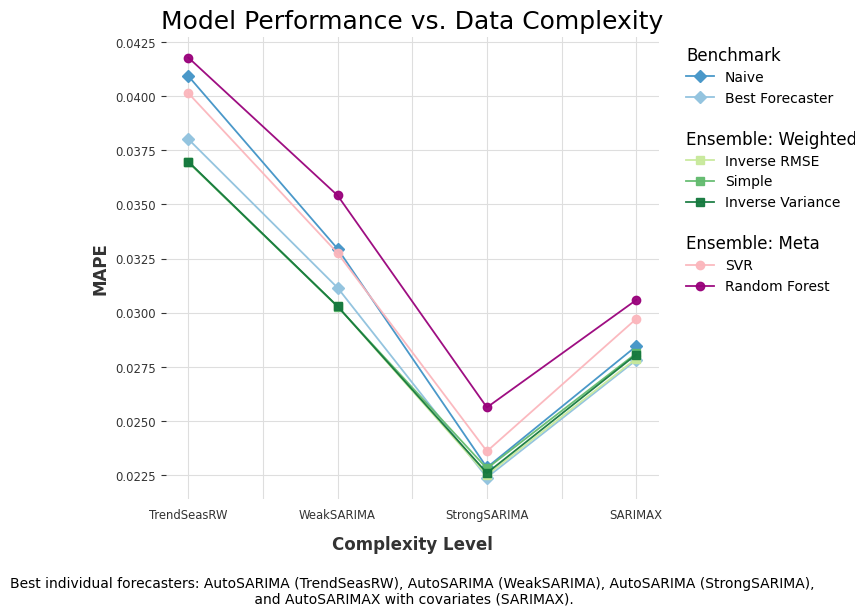

In [14]:
#file_names = ["TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"]
plot_metrics(
    metric="MAPE", 
    sort_labels=file_names,
    remove_models=["Weighted Ensemble: Inverse Error Covariance"],
    export=True)